<a href="https://colab.research.google.com/github/rajim0112/GitHubDemo/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv('/content/IRIS.csv')

In [ ]:
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [ ]:
df.tail()

sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

In [ ]:
df.shape

(150, 5)

In [ ]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [ ]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.species.replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), (1,2,3), inplace=True)


<ipython-input-10-228d9ba6ef3e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.species.replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), (1,2,3), inplace=True)


In [ ]:
df.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1

In [ ]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    2.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    1.000000
25%        5.100000     2.800000      1.600000     0.300000    1.000000
50%        5.800000     3.000000      4.350000     1.300000    2.000000
75%        6.400000     3.300000      5.100000     1.800000    3.000000
max        7.900000     4.400000      6.900000     2.500000    3.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: >

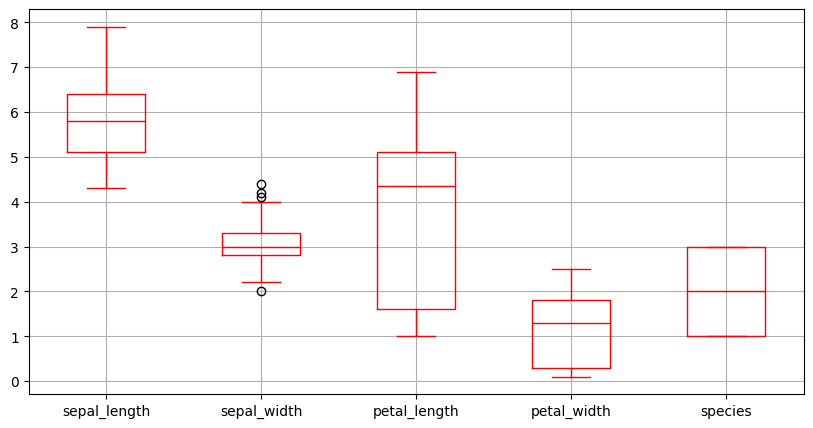

In [ ]:
plt.figure(figsize = (10, 5))
df.boxplot(color='red')

In [ ]:
df1=df[df.species==1]
df2=df[df.species==2]
df3=df[df.species==3]

In [ ]:
df2

sepal_length  sepal_width  petal_length  petal_width  species
50           7.0          3.2           4.7          1.4        2
51           6.4          3.2           4.5          1.5        2
52           6.9          3.1           4.9          1.5        2
53           5.5          2.3           4.0          1.3        2
54           6.5          2.8           4.6          1.5        2
55           5.7          2.8           4.5          1.3        2
56           6.3          3.3           4.7          1.6        2
57           4.9          2.4           3.3          1.0        2
58           6.6          2.9           4.6          1.3        2
59           5.2          2.7           3.9          1.4        2
60           5.0          2.0           3.5          1.0        2
61           5.9          3.0           4.2          1.5        2
62           6.0          2.2           4.0          1.0        2
63           6.1          2.9           4.7          1.4        2
64           5.6          2.9           3.6          1.3        2
65           6.7          3.1           4.4          1.4        2
66           5.6          3.0           4.5          1.5        2
67           5.8          2.7           4.1          1.0        2
68           6.2          2.2           4.5          1.5        2
69           5.6          2.5           3.9          1.1        2
70           5.9          3.2           4.8          1.8        2
71           6.1          2.8           4.0          1.3        2
72           6.3          2.5           4.9          1.5        2
73           6.1          2.8           4.7          1.2        2
74           6.4          2.9           4.3          1.3        2
75           6.6          3.0           4.4          1.4        2
76           6.8          2.8           4.8          1.4        2
77           6.7          3.0           5.0          1.7        2
78           6.0          2.9           4.5          1.5        2
79           5.7          2.6           3.5          1.0        2
80           5.5          2.4           3.8          1.1        2
81           5.5          2.4           3.7          1.0        2
82           5.8          2.7           3.9          1.2        2
83           6.0          2.7           5.1          1.6        2
84           5.4          3.0           4.5          1.5        2
85           6.0          3.4           4.5          1.6        2
86           6.7          3.1           4.7          1.5        2
87           6.3          2.3           4.4          1.3        2
88           5.6          3.0           4.1          1.3        2
89           5.5          2.5           4.0          1.3        2
90           5.5          2.6           4.4          1.2        2
91           6.1          3.0           4.6          1.4        2
92           5.8          2.6           4.0          1.2        2
93           5.0          2.3           3.3          1.0        2
94           5.6          2.7           4.2          1.3        2
95           5.7          3.0           4.2          1.2        2
96           5.7          2.9           4.2          1.3        2
97           6.2          2.9           4.3          1.3        2
98           5.1          2.5           3.0          1.1        2
99           5.7          2.8           4.1          1.3        2

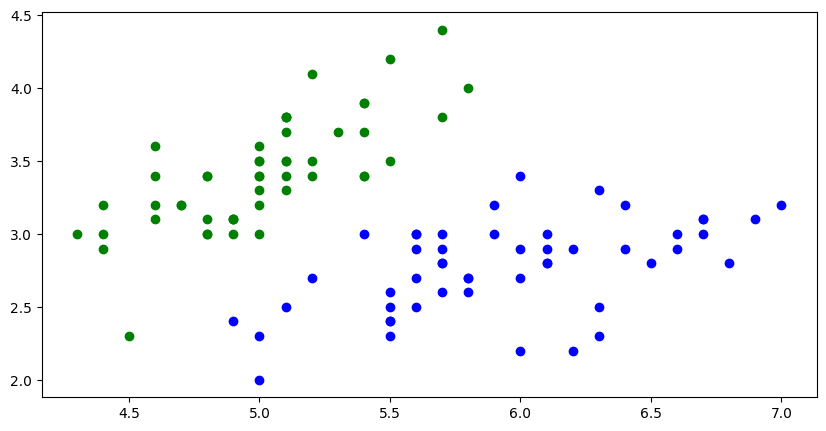

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(x=df1['sepal_length'],y=df1['sepal_width'], color='green')
plt.scatter(x=df2['sepal_length'],y=df2['sepal_width'], color='blue')
#plt.scatter(x=df3['sepal_length'],y=df3['sepal_width'], color='red')

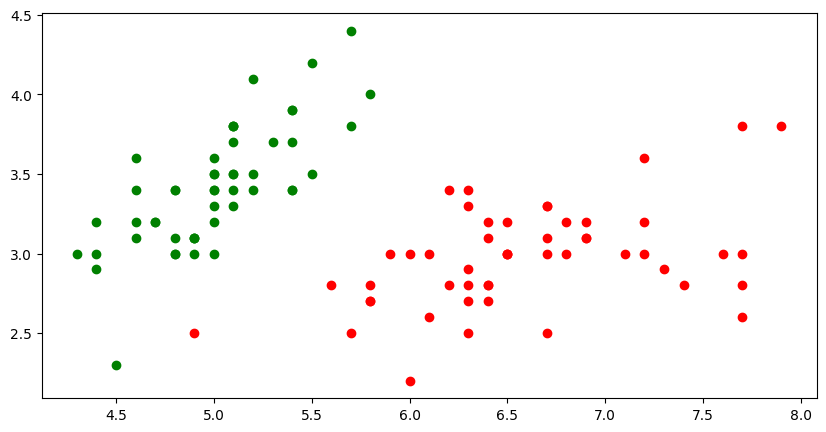

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(x=df1['sepal_length'],y=df1['sepal_width'], color='green')
plt.scatter(x=df3['sepal_length'],y=df3['sepal_width'], color='red')

In [ ]:
x=df.drop(['species'],axis='columns')
x.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [ ]:
y=df.species
y.head()

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [ ]:
len(x_train)

120

In [ ]:
len(x_test)

30

In [ ]:
model = SVC()

In [ ]:
model.fit(x_train,y_train)

SVC()

In [ ]:
model.score(x_test,y_test )

0.9666666666666667